In [ ]:
!pip3 install lmfit
import lmfit as lm
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[0.001062646443741172, 0.0007967418971759288, 0.0009206238548427171, 0.0008565357438073684, 0.0009048483044805989, 0.0007497014000664549, 0.000851493686317173, 0.0007981362840832507, 0.0008542450072079101, 0.0007688167140802228]
[7.357211506932902e-06, 7.77991987116753e-06, 7.3050749913982285e-06, 7.483919093051241e-06, 7.902678593375377e-06, 8.51196445019835e-06, 4.707211987299863e-06, 7.668696305142116e-06, 3.7846356133314597e-06, 6.98931958196522e-06]


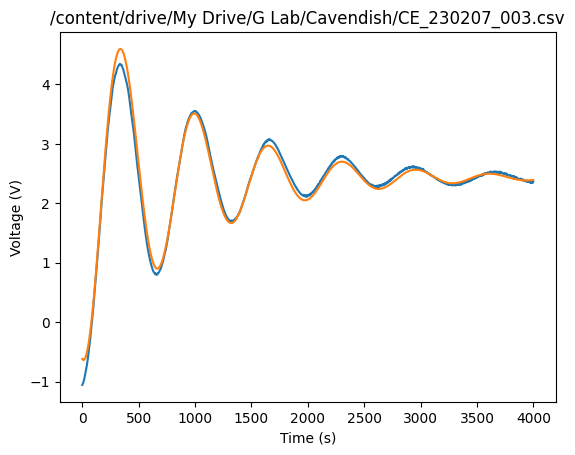

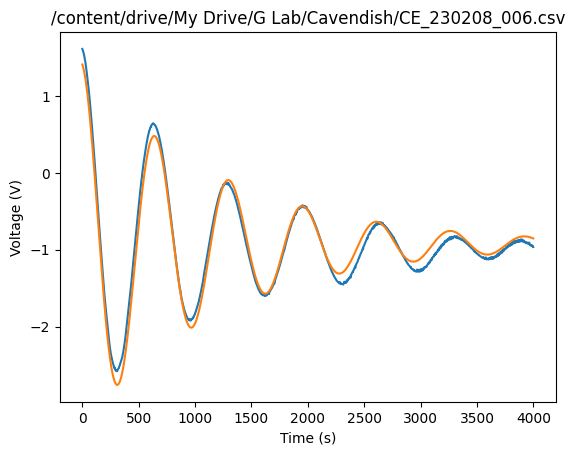

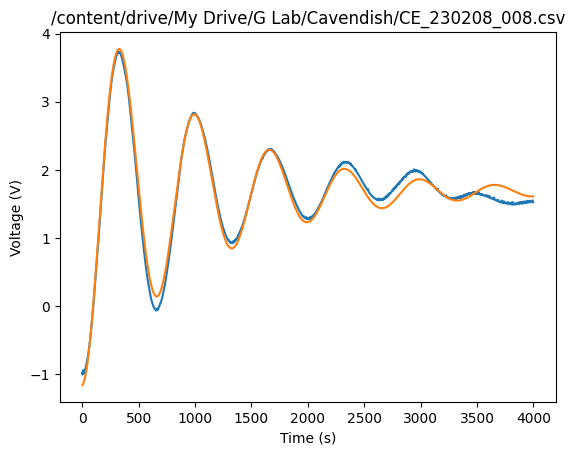

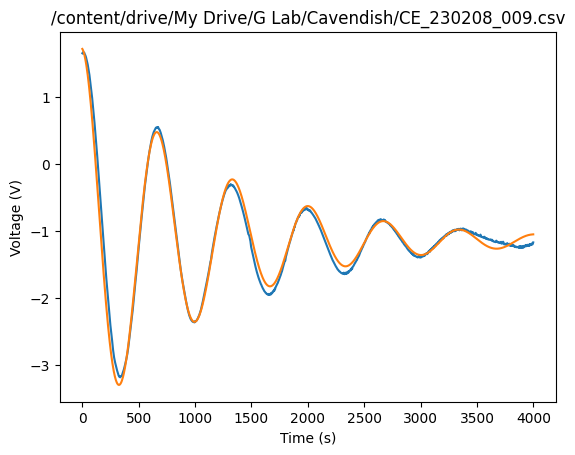

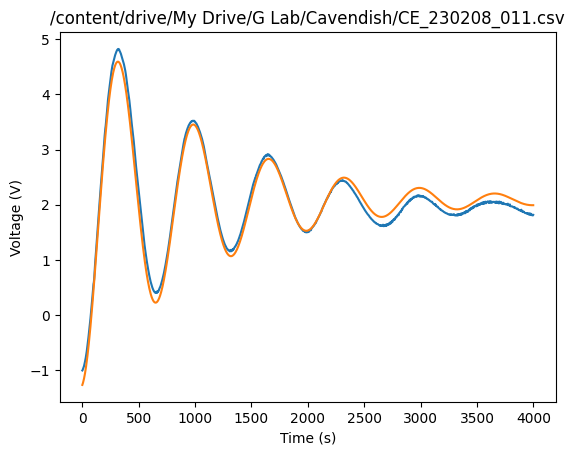

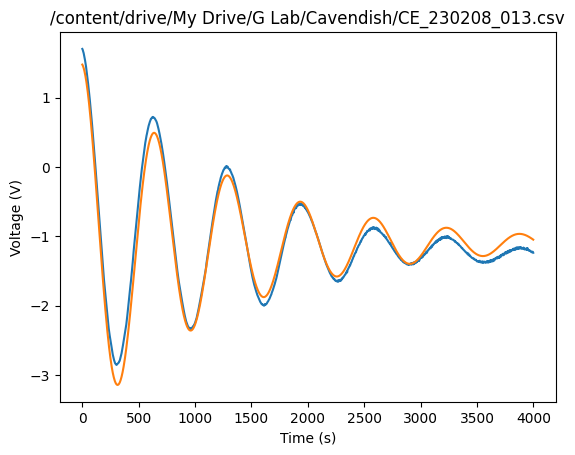

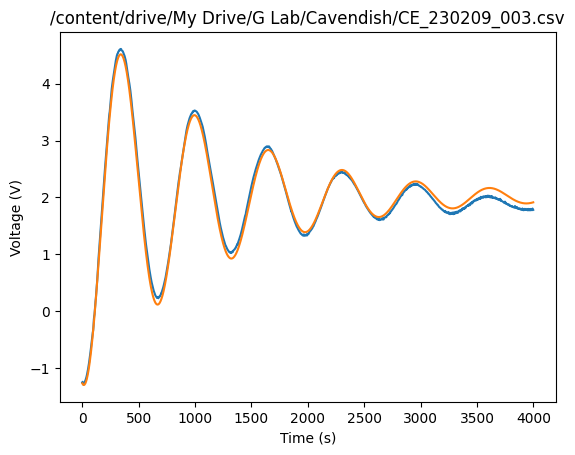

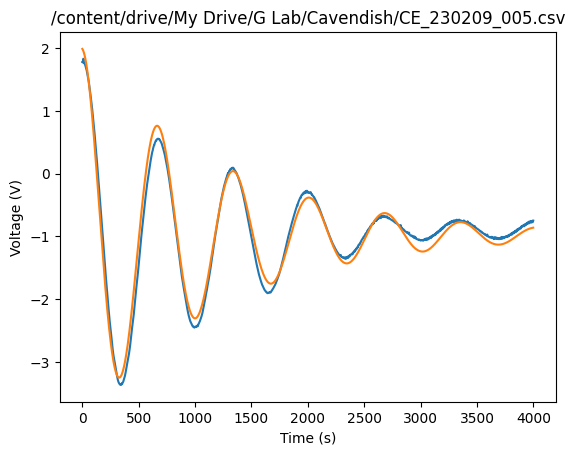

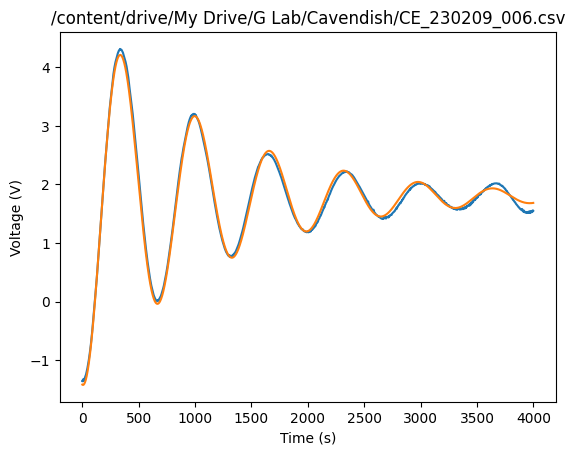

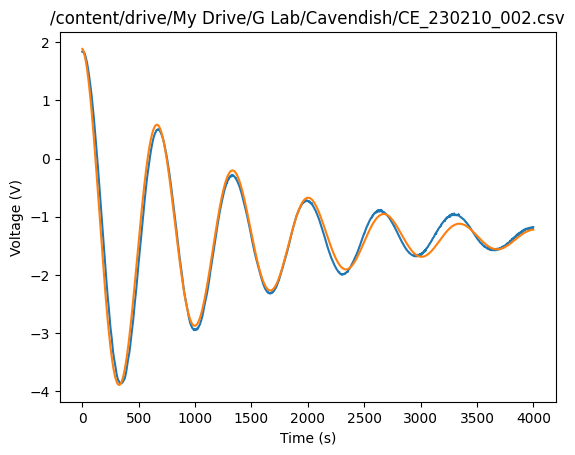

In [ ]:
#access files in notebook - file path
file_path = '/content/drive/My Drive/G Lab/Cavendish/*.csv'

#list of filenames
files = glob.glob(file_path)
#print(files)

#read EACH one (each implies for loop)
#for loop over files


#decay_cos()
#def decay_cos(variable,parameters)
def decay_cos(x,A,alpha,omega,phi,c):
  return A*np.exp(-alpha*x)*np.cos(omega*x+phi)+c



alpha_values = []
alpha_errors = []


for curr_file in files:
  # 
  # read csv file
  df = pd.read_csv(curr_file)
  #print(df.head())
  # use pandas to read  -  df = pd.read_csv(curr_file)
  # extract data using column names of variables (col_names = df.columns)
  curr_time = df['Time(s)']
  curr_voltage = df['Position(V)']
    #print(curr_voltage)
  #truncate data
  max_time = 4000
  good_idx = curr_time <= max_time
  curr_time = curr_time[good_idx]
  curr_voltage = curr_voltage[good_idx]
  
  #fitting
  model = lm.models.Model(decay_cos)
  #initialize parameters
  model.set_param_hint('A', value = 3.0)
  model.set_param_hint('alpha', value = 0.001, min = 0, max = .1)
  model.set_param_hint('omega', value = 0.01, min = 0, max = 1)
  model.set_param_hint('phi', value = 1.0, min = 0, max = 2*np.pi)
  model.set_param_hint('c', value = np.mean(curr_voltage))

  #build parameter object
  my_params = model.make_params()
  #perform fit
  result = model.fit(curr_voltage, params = my_params, x = curr_time)
  #print(result.fit_report())
  
  alpha_val = result.params['alpha'].value
  alpha_err = result.params['alpha'].stderr
  alpha_values.append(alpha_val)
  alpha_errors.append(alpha_err)

  plt.figure()
  plt.xlabel('Time (s)')
  plt.ylabel('Voltage (V)')
  #plt.title('Fitted Voltage over Time')
  plt.plot(curr_time, curr_voltage)
  plt.plot(curr_time, result.eval(x=curr_time))
  plt.title(curr_file)

#print(alpha_values)
#print(alpha_errors)
  



In [ ]:
#access files in notebook - file path
file_path = '/content/drive/My Drive/G Lab/Cavendish/*.csv'

#list of filenames
files = glob.glob(file_path)
#print(files)

#read EACH one (each implies for loop)
#for loop over files


#decay_cos()
#def decay_cos(variable,parameters)
def decay_cos(x,A,alpha,omega,phi,c):
  return A*np.exp(-alpha*x)*np.cos(omega*x+phi)+c



alpha_values = []
alpha_errors = []


for curr_file in files:
  # 
  # read csv file
  df = pd.read_csv(curr_file)
  #print(df.head())
  # use pandas to read  -  df = pd.read_csv(curr_file)
  # extract data using column names of variables (col_names = df.columns)
  curr_time = df['Time(s)']
  curr_voltage = df['Position(V)']
    #print(curr_voltage)
  #truncate data
  max_time = 4000
  good_idx = curr_time <= max_time
  curr_time = curr_time[good_idx]
  curr_voltage = curr_voltage[good_idx]
  
  #fitting
  model = lm.models.Model(decay_cos)
  #initialize parameters
  model.set_param_hint('A', value = 3.0)
  model.set_param_hint('alpha', value = 0.001, min = 0, max = .1)
  model.set_param_hint('omega', value = 0.01, min = 0, max = 1)
  model.set_param_hint('phi', value = 1.0, min = 0, max = 2*np.pi)
  model.set_param_hint('c', value = np.mean(curr_voltage))

  #build parameter object
  my_params = model.make_params()
  #perform fit
  result = model.fit(curr_voltage, params = my_params, x = curr_time)
  #print(result.fit_report())
  
  alpha_val = result.params['alpha'].value
  alpha_err = result.params['alpha'].stderr
  alpha_values.append(alpha_val)
  alpha_errors.append(alpha_err)

  A = result.params['A'].value
  alpha = result.params['alpha'].value
  omega = result.params['omega'].value
  phi = result.params['phi'].value
  c = result.params['c'].value

  #plt.figure()
  #plt.xlabel('Time (s)')
  #plt.ylabel('Voltage (V)')
  #plt.title('Fitted Voltage over Time')
  #plt.plot(curr_time, curr_voltage)
  #plt.plot(curr_time, result.eval(x=curr_time))
  #plt.title(curr_file)

  print(A)

#print(alpha_values)
#print(alpha_errors)
  



3.121544765792254
2.3523280789727004
2.842683551043773
2.8580783598528288
3.357638563854926
2.5816452650765283
3.3611798154385806
2.961402562177699
3.238370441302525
3.2522445859425746


G is 6.126918196782008e-11 ± 7.467132417898851e-12
Variance is 5.636546516841926e-23


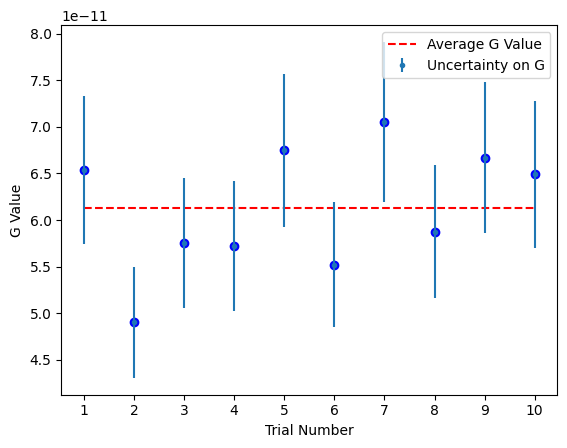

In [ ]:
df = pd.read_csv('/content/drive/My Drive/G Lab/Gdata2.csv')

pi = np.pi
d = df['d']
theta = df['theta']
T = df['T']
M = df['M']
R = df['R']
trial_number = df['Trial Number']

G = (4*(pi**2)*d*theta*(R**2))/((T**2)*2*M)

dGdd = (4*(pi**2)*theta*(R**2))/((T**2)*2*M)
dGdtheta = (4*(pi**2)*d*(R**2))/((T**2)*2*M)
dGdR = (4*(pi**2)*d*theta*(R*2))/((T**2)*2*M)
dGdT = (4*(pi**2)*d*theta*(R**2))/((-T**3)*2*M)
dGdM = (4*(pi**2)*d*theta*(R**2))/((T**2)*2*(M**2))

omega = df['omega']
dTdomega = (-2*pi)/(omega**2)
sigma_omega = 7.61 * (10**(-6))
sigma_T = (dTdomega**2)*(sigma_omega**2)

s = df['sx']
L = 219
dthetadL = -s/(2*((s**2)*(L**2)))
sigma_L = 0.1
dthetads = L/(2*((s**2)*(L**2)))
sigma_s = 0.01
sigma_theta = (dthetadL**2)*(sigma_L**2)

sigma_d = 0.001
sigma_R = 0.003
sigma_M = 0.001

sigma_G_squared = (dGdd**2)*(sigma_d**2) + (dGdtheta**2)*(sigma_theta**2) + (dGdR**2)*(sigma_R**2) + (dGdT**2)*(sigma_T**2) + (dGdM**2)*(sigma_M**2)
sigma_G = np.sqrt(sigma_G_squared)
G_avg = np.mean(G)
avg_variance = np.mean(sigma_G_squared)
print("G is", G_avg, "±", np.mean(sigma_G))
print("Variance is", avg_variance)

plt.xlabel('Trial Number')
plt.ylabel('G Value')
plt.plot(trial_number, G, 'bo')
plt.plot(trial_number, np.ones(len(trial_number)) * G_avg, '--r', label = 'Average G Value')
plt.xticks(np.arange(1, 11))
plt.errorbar(trial_number, G, yerr = sigma_G, fmt = '.', label = 'Uncertainty on G')
plt.legend()
plt.show()